# Community Center Attendance

## Introduction  
Feelings of belonging and a sense of community are very important to an individual's happiness. By measuring the daily attendance of a community centers, we can find the associated neighborhood with the strongest sense of community, making it the happiest neighborhood to live in.

This analysis focuses on **daily community attendance since 2011** and looks at their **average attendance over time**.

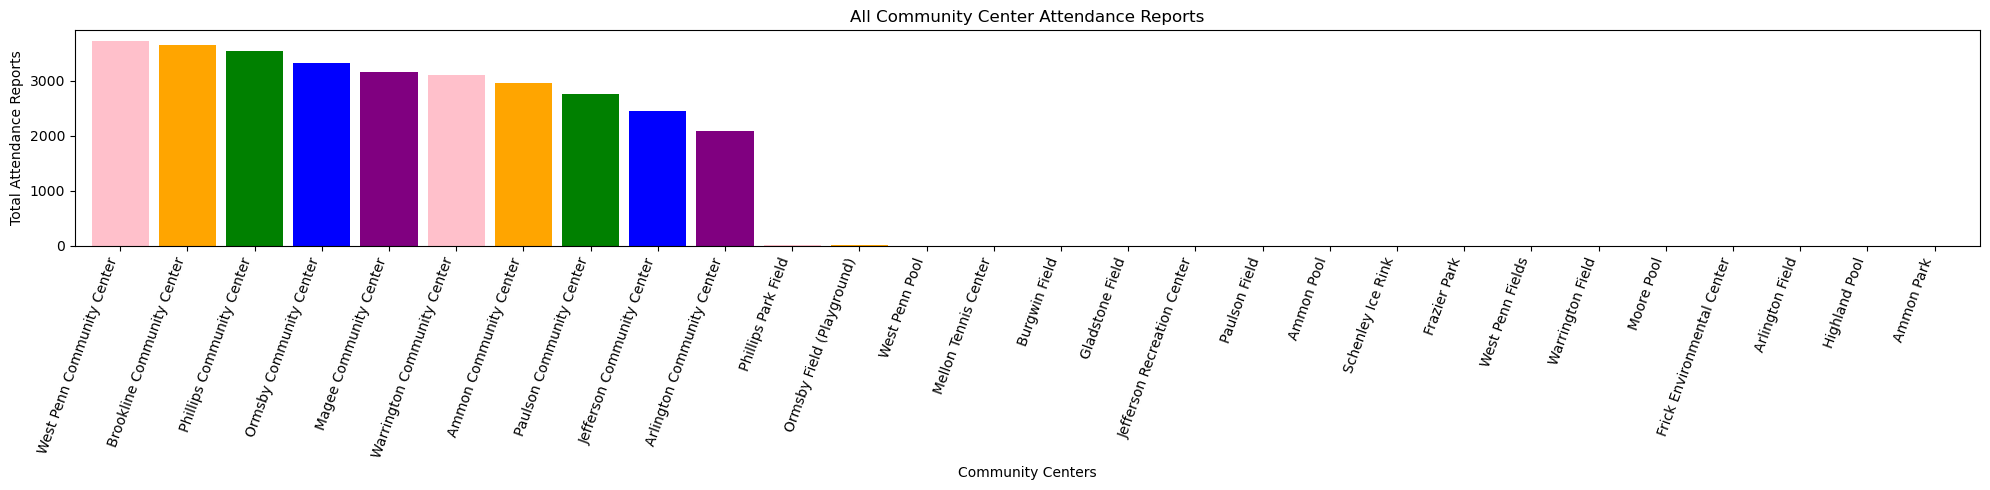

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Get data from CSV file
data = pd.read_csv("Datasets/Daily_Community_Center_Attendence.csv", index_col="date", parse_dates=True)
# Sort centers by name and plot total counts
centers = data['center_name'].value_counts().sort_values(ascending=False)
colors = ['pink', 'orange', 'green', 'blue', 'purple']
centers.plot(kind='bar', figsize=(20, 5), color=colors, width=0.85)
plt.title("All Community Center Attendance Reports")
plt.xlabel("Community Centers")
plt.ylabel("Total Attendance Reports")
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

## It appears only 10 centers actively report their attendance counts.

In [10]:
centers.head(10)

center_name
West Penn Community Center     3726
Brookline Community Center     3651
Phillips Community Center      3530
Ormsby Community Center        3318
Magee Community Center         3158
Warrington Community Center    3099
Ammon Community Center         2957
Paulson Community Center       2763
Jefferson Community Center     2456
Arlington Community Center     2091
Name: count, dtype: int64

## We must clean the data to filter out non-centers and non-active entries.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'West Penn Community Center'),
  Text(1, 0, 'Brookline Community Center'),
  Text(2, 0, 'Phillips Community Center'),
  Text(3, 0, 'Ormsby Community Center'),
  Text(4, 0, 'Magee Community Center'),
  Text(5, 0, 'Warrington Community Center'),
  Text(6, 0, 'Ammon Community Center'),
  Text(7, 0, 'Paulson Community Center'),
  Text(8, 0, 'Jefferson Community Center'),
  Text(9, 0, 'Arlington Community Center')])

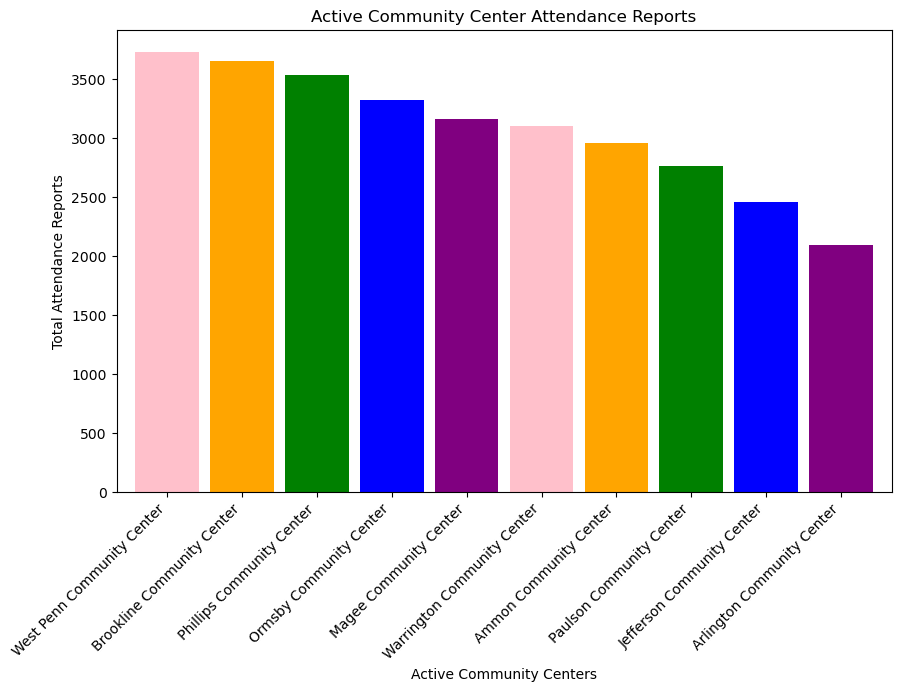

In [37]:
# Filter out nonreporting centers and noncenter entries
def filt(a, threshold):
    if a["attendance_count"].count() > threshold:
        return True
    else:
        return False
active = data.groupby("center_name").filter(filt, threshold=2000)
# Plot active centers' attendance report count
colors = ['pink', 'orange', 'green', 'blue', 'purple']
active['center_name'].value_counts().sort_values(ascending=False).plot(kind='bar', color=colors, figsize=(10, 6), width=0.85)
plt.title("Active Community Center Attendance Reports")
plt.xlabel("Active Community Centers")
plt.ylabel("Total Attendance Reports")
plt.xticks(rotation=45, ha='right')

## Now let's look at each center's average daily attendance since 2011.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Brookline Community Center'),
  Text(1, 0, 'Phillips Community Center'),
  Text(2, 0, 'West Penn Community Center'),
  Text(3, 0, 'Ammon Community Center'),
  Text(4, 0, 'Warrington Community Center'),
  Text(5, 0, 'Arlington Community Center'),
  Text(6, 0, 'Magee Community Center'),
  Text(7, 0, 'Ormsby Community Center'),
  Text(8, 0, 'Jefferson Community Center'),
  Text(9, 0, 'Paulson Community Center')])

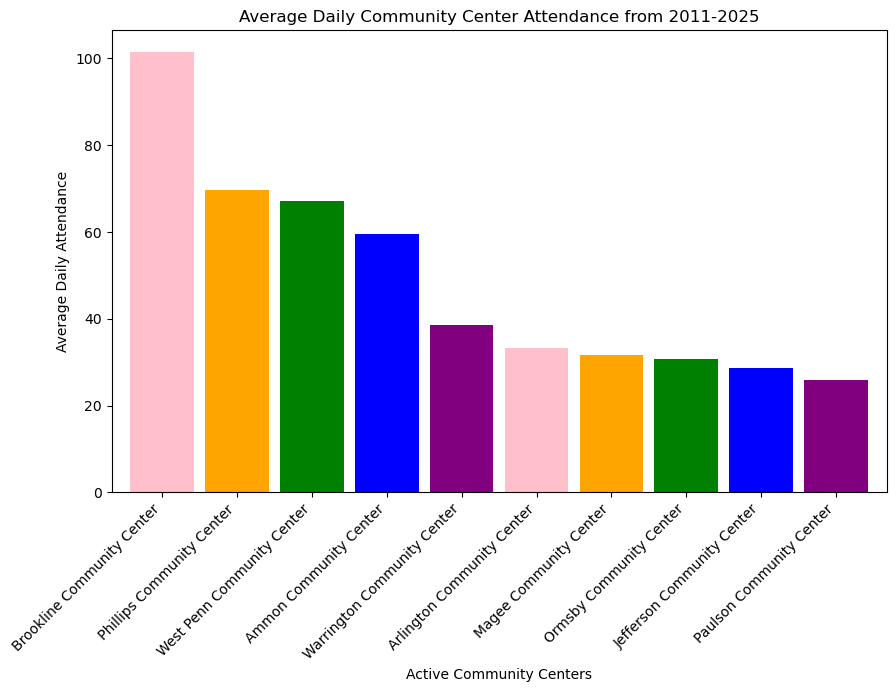

In [41]:
# Plot average daily attendance for each center
colors = ['pink', 'orange', 'green', 'blue', 'purple']
average = active.groupby('center_name')['attendance_count'].mean().sort_values(ascending=False)
average.plot(kind='bar', color=colors, figsize=(10, 6), width=0.85)
plt.title("Average Daily Community Center Attendance from 2011-2025")
plt.xlabel("Active Community Centers")
plt.ylabel("Average Daily Attendance")
plt.xticks(rotation=45, ha='right')

In [34]:
print(average)

center_name
Brookline Community Center     101.408929
Phillips Community Center       69.755807
West Penn Community Center      67.221685
Ammon Community Center          59.467704
Warrington Community Center     38.587932
Arlington Community Center      33.231946
Magee Community Center          31.616529
Ormsby Community Center         30.783605
Jefferson Community Center      28.610342
Paulson Community Center        25.917843
Name: attendance_count, dtype: float64


## Brookline Community Center, located in Brookline, has the highest average daily attendance with an average of about 101 attendees.
### This average is over the course of 2011-2025. However, a lot can happen in 14 years. Let's look at which centers' attendance may be growing or diminishing.

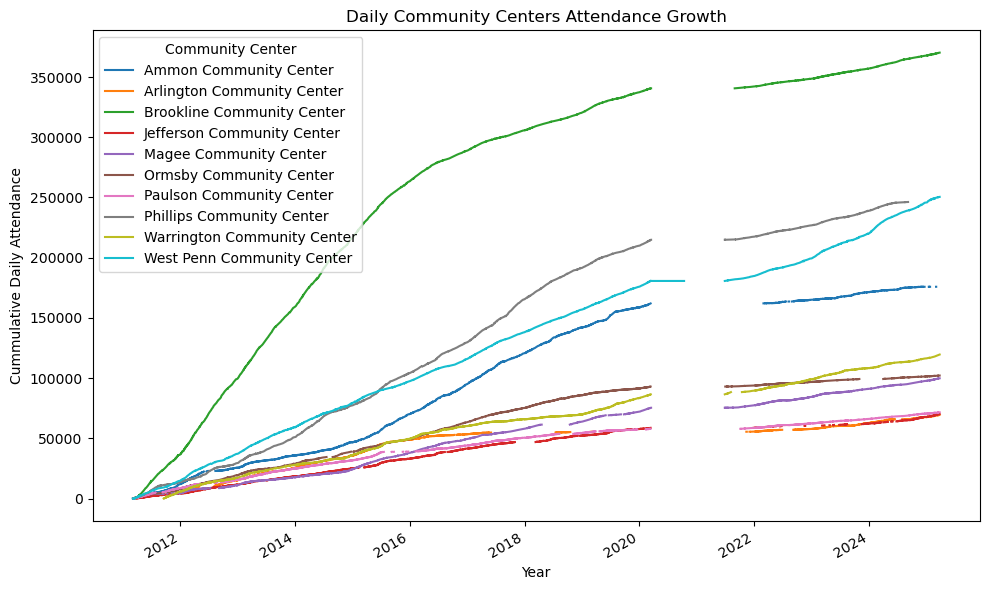

In [43]:
# Pivot and plot data in line graph
pivot = active.pivot(columns="center_name", values="attendance_count")
pivot.cumsum().plot(figsize=(10, 6))
plt.title("Daily Community Centers Attendance Growth")
plt.xlabel("Year")
plt.ylabel("Cummulative Daily Attendance")
plt.legend(title='Community Center', loc='upper left')
plt.tight_layout()


## It appears Brookline was rapidly increasing its daily attendance from 2013-2015, but is not increasing as steeply anymore. Other contenders include Ormsby Community Center (South Side), West Penn Community Center (Polish Hill), and Ammon Community Center (Hill District).
### Finally, let's look at how daily attendance has fluctuated over the years.

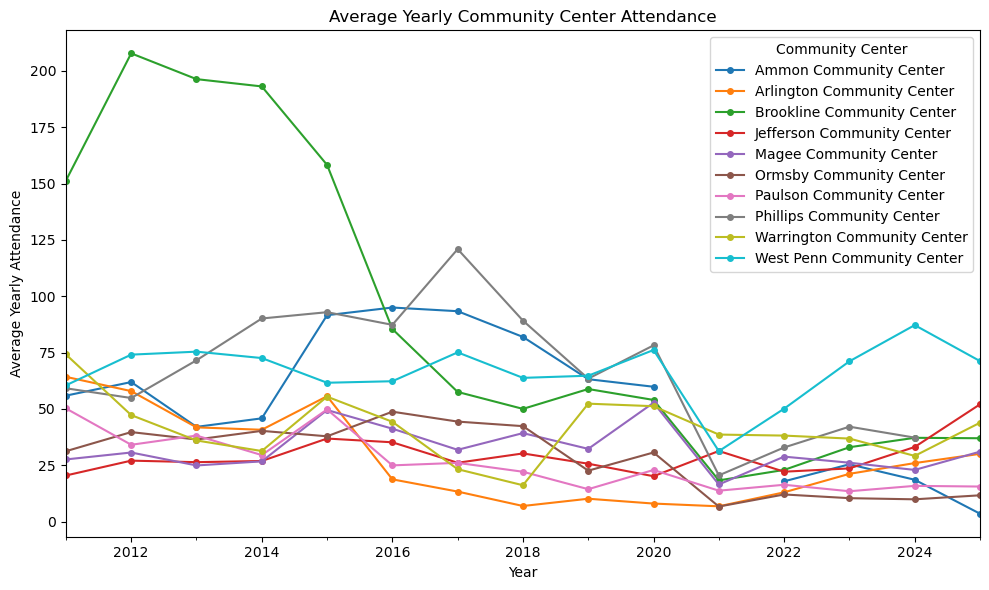

In [53]:
# Plot average yearly attendance for each center
pivot.resample("Y").mean().plot(figsize=(10,6),  marker='o', markersize=4)
plt.title("Average Yearly Community Center Attendance")
plt.xlabel("Year")
plt.ylabel("Average Yearly Attendance")
plt.legend(title='Community Center')
plt.tight_layout()

## On this graph, Brookline begins as the highest yearly average attendance, but dwindles over the years. After all centers face low attendance during Covid, West Penn Community Center emerges as the leader in yearly average attendance.

## Conclusion
The most strongly attended community center in recent years is **West Penn Community Center** which is located in the **Polish Hills**  neighborhood. Thus, **Polish Hills** is most community-oriented, active, and therefore **happiest neighborhood**.

I have never been to Polish Hills personally besides driving through it. This neighborhood was not previously on my radar for being the happiest. Yet, it is unsurprising that I, as an outsider, would not feel how connected and happy residents of Polish Hills are.